<a href="https://colab.research.google.com/github/RAFAA-star/Analyse-Pr-dictive-du-Phasage-entre-la-Consommation-et-la-Production-Energ-tique-en-France-/blob/main/Analyser_les_donn%C3%A9es_g%C3%A9nomiques_en_utilisant_Python_et_des_biblioth%C3%A8ques_bioinformatiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

démarrer avec l'analyse des données génomiques, voici quelques exemples de code utilisant Python et des outils couramment utilisés en bioinformatique. Ces exemples couvrent le téléchargement des données, le prétraitement, l'alignement et l'analyse des séquences.

# 1. Installation des Bibliothèques Nécessaires
Avant de commencer, assurez-vous d'installer les bibliothèques nécessaires en utilisant pip :

In [1]:
!pip install biopython pandas matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 19.7 MB/s eta 0:00:00


# 2. Téléchargement et Prétraitement des Données
Nous allons utiliser Biopython pour travailler avec les données génomiques. Commençons par télécharger une séquence d'ADN à partir de la base de données NCBI.

In [2]:
from Bio import Entrez, SeqIO

# Remplacez votre adresse email ici
Entrez.email = "rafaaotmani61@gmail.com"

# Téléchargez une séquence d'ADN à partir de NCBI
def download_sequence(accession):
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    return record

# Exemple avec l'accession de la séquence
sequence_accession = "NM_001301717.2"
sequence_record = download_sequence(sequence_accession)
print(sequence_record)


ID: NM_001301717.2
Name: NM_001301717
Description: Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
Number of features: 10
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=02-JUN-2024
/accessions=['NM_001301717']
/sequence_version=2
/keywords=['RefSeq']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='CCL21-CCR7 signaling promotes microglia/macrophage recruitment and chemotherapy resistance in glioblastoma', ...), Reference(title='CCL19/CCR7 drives regulatory T cell migration and indicates poor prognosis in gastric cancer', ...), Reference(title='Effects of chemokine receptor CCR7 in the pathophysiology and clinical features of the immuno-inflammatory response in primary pterygium', ...), Reference(title='Heparin S

# 3. Alignement de Séquences avec BLAST
Utilisons BLAST pour aligner la séquence téléchargée avec une base de données locale.

In [3]:
from Bio.Blast import NCBIWWW, NCBIXML

# Effectuer une recherche BLAST en ligne
result_handle = NCBIWWW.qblast("blastn", "nt", sequence_record.seq)

# Lire les résultats de BLAST
blast_record = NCBIXML.read(result_handle)

# Afficher les résultats
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        print(f"****Alignment****")
        print(f"sequence: {alignment.title}")
        print(f"length: {alignment.length}")
        print(f"e value: {hsp.expect}")
        print(f"{hsp.query[0:75]}...")
        print(f"{hsp.match[0:75]}...")
        print(f"{hsp.sbjct[0:75]}...")


****Alignment****
sequence: gi|1890278173|ref|NM_001301717.2| Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
length: 2191
e value: 0.0
CTCTAGATGAGTCAGTGGAGGGCGGGTGGAGCGTTGAACCGTGAAGAGTGTGGTTGGGCGTAAACGTGGACTTAA...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
CTCTAGATGAGTCAGTGGAGGGCGGGTGGAGCGTTGAACCGTGAAGAGTGTGGTTGGGCGTAAACGTGGACTTAA...
****Alignment****
sequence: gi|1519241504|ref|NM_001838.4| Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 1, mRNA
length: 2173
e value: 0.0
GGGGAAACCAATGAAAAGCGTGCTGGTGGTGGCTCTCCTTGTCATTTTCCAGGTATGCCTGTGTCAAGATGAGGT...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
GGGGAAACCAATGAAAAGCGTGCTGGTGGTGGCTCTCCTTGTCATTTTCCAGGTATGCCTGTGTCAAGATGAGGT...
****Alignment****
sequence: gi|23243433|gb|BC035343.1| Homo sapiens chemokine (C-C motif) receptor 7, mRNA (cDNA clone MGC:34623 IMAGE:5180758), complete cds
length: 2173
e value: 0.0
GGGGAAACCAA

# 4. Analyse des Données RNA-seq
Supposons que nous ayons des données RNA-seq. Nous allons utiliser pandas pour manipuler les données et matplotlib/seaborn pour la visualisation.

    gene  condition_A  condition_B  log2_fold_change
0  gene1          100           80         -0.321928
1  gene2          150          180          0.263034
2  gene3          200          160         -0.321928
3  gene4          250          270          0.111031
4  gene5          300          310          0.047306


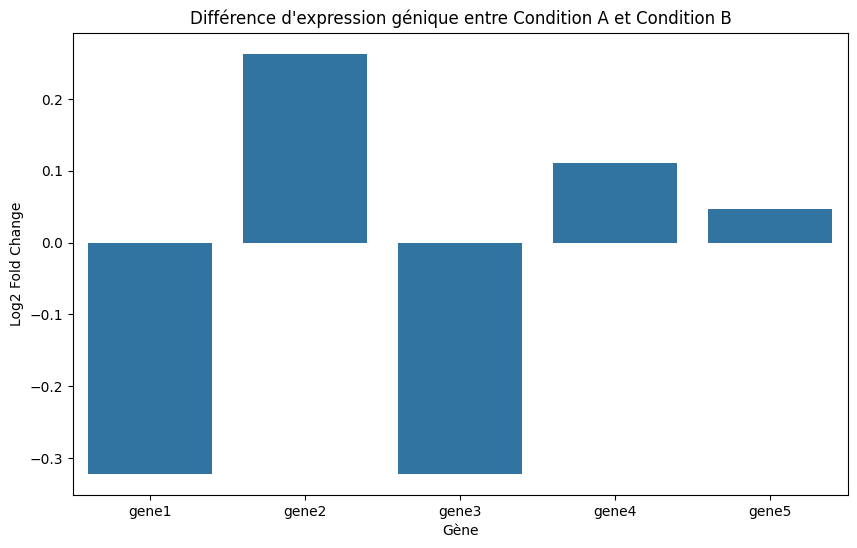

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import the NumPy library

# Chargement des données RNA-seq simulées
data = {
    'gene': ['gene1', 'gene2', 'gene3', 'gene4', 'gene5'],
    'condition_A': [100, 150, 200, 250, 300],
    'condition_B': [80, 180, 160, 270, 310]
}

df = pd.DataFrame(data)

# Calculer les différences d'expression génique
df['log2_fold_change'] = (df['condition_B'] / df['condition_A']).apply(lambda x: np.log2(x)) # Use np.log2()

# Afficher les résultats
print(df)

# Visualiser les différences d'expression
plt.figure(figsize=(10, 6))
sns.barplot(x='gene', y='log2_fold_change', data=df)
plt.title('Différence d\'expression génique entre Condition A et Condition B')
plt.xlabel('Gène')
plt.ylabel('Log2 Fold Change')
plt.show()

# 5. Annotation des Gènes
Nous pouvons utiliser les bibliothèques comme Biopython pour annoter les séquences et les bases de données comme Ensemble pour obtenir des informations sur les gènes.

In [6]:
from Bio import ExPASy, SwissProt

def get_gene_annotations(gene_name):
    handle = ExPASy.get_sprot_raw(gene_name)
    record = SwissProt.read(handle)
    handle.close()
    return record

# Exemple avec un gène spécifique
gene_name = "P53_HUMAN"
gene_record = get_gene_annotations(gene_name)

# Afficher les annotations du gène
print(f"Gene Name: {gene_record.entry_name}")
print(f"Organism: {gene_record.organism}")
print(f"Sequence Length: {gene_record.sequence_length}")
print(f"Functions: {gene_record.comments}")


Gene Name: P53_HUMAN
Organism: Homo sapiens (Human).
Sequence Length: 393
Functions: ['FUNCTION: Acts as a tumor suppressor in many tumor types; induces growth arrest or apoptosis depending on the physiological circumstances and cell type (PubMed:11025664, PubMed:12524540, PubMed:12810724, PubMed:15186775, PubMed:15340061, PubMed:17189187, PubMed:17317671, PubMed:17349958, PubMed:19556538, PubMed:20673990, PubMed:20959462, PubMed:22726440, PubMed:24051492, PubMed:24652652, PubMed:9840937). Involved in cell cycle regulation as a trans-activator that acts to negatively regulate cell division by controlling a set of genes required for this process (PubMed:11025664, PubMed:12524540, PubMed:12810724, PubMed:15186775, PubMed:15340061, PubMed:17317671, PubMed:17349958, PubMed:19556538, PubMed:20673990, PubMed:20959462, PubMed:22726440, PubMed:24051492, PubMed:24652652, PubMed:9840937). One of the activated genes is an inhibitor of cyclin-dependent kinases. Apoptosis induction seems to be medi

# Conclusion
Ces exemples de code montrent comment vous pouvez commencer à analyser les données génomiques en utilisant Python et des bibliothèques bioinformatiques. Vous pouvez étendre ces exemples pour répondre à des besoins plus spécifiques et utiliser d'autres outils et techniques de data science pour approfondir votre analyse.